Project Proposal:

1.	I am interested in the atmospheric sciences and time series data. I would like to use data on date and intensity of hurricanes to predict future trends in hurricane number and intensity. The tool I would like to use is the fbProphet python package, created specifically for time series data. (https://facebook.github.io/prophet/)
2.	The predictability of hurricanes is important economically in the ability to better prepare buildings, budgets, and people for climate change. This project would be interesting because it would be coming at it from a statistical point of view rather than a physical simulation point of view.
3.	There are several questions:
a.	I try and answer if it is possible to replicate past years data on hurricane formation dates and intensity.
b.	I try and show a prediction for future years of hurricane formation and intensity.
4.	The data on intensity and date is publicly accessible NOAA data. (https://www.nhc.noaa.gov/data/)
5.	Date of formation (or landfall) and intensity
6.	Past years data on formation and intensity. The package Prophet uses a simple input and output to predict future trends. It would be interesting to compare to more robust, physical models.
7.	Summary statistics, scatter plot, chi-squared, 95% confidence interval. 



In [47]:
#Imports

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from fbprophet import Prophet
from datetime import datetime

In [4]:
df = pd.read_csv('hurdat2-1851-2018-120319.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53219 entries, 0 to 53218
Data columns (total 21 columns):
TimeStamp        53219 non-null object
Name             53219 non-null object
Points           53219 non-null object
Type             51346 non-null object
Latitude         51346 non-null object
Longitude        51346 non-null object
MaxWind          51346 non-null float64
MinPressure      51346 non-null float64
34ktWindMaxNE    51346 non-null float64
34ktWindMaxSE    51346 non-null float64
34WindMaxSW      51346 non-null float64
34ktWindMaxNW    51346 non-null float64
50ktWindMaxNE    51346 non-null float64
50ktWindMaxSE    51346 non-null float64
50ktWindMaxSW    51346 non-null float64
50ktWindMaxNW    51346 non-null float64
64ktMaxWindNE    51346 non-null float64
64ktMaxWindSE    51346 non-null float64
64ktMaxWindSW    51346 non-null float64
64ktMaxWindNW    51346 non-null float64
Unnamed: 20      3 non-null object
dtypes: float64(14), object(7)
memory usage: 8.5+ MB


C:\Users\Emily\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df.head(20)

,TimeStamp,Name,Points,Type,Latitude,Longitude,MaxWind,MinPressure,34ktWindMaxNE,34ktWindMaxSE,...,34ktWindMaxNW,50ktWindMaxNE,50ktWindMaxSE,50ktWindMaxSW,50ktWindMaxNW,64ktMaxWindNE,64ktMaxWindSE,64ktMaxWindSW,64ktMaxWindNW,Unnamed: 20
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18510625,0,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
2,18510625,600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
5,18510625,2100,L,HU,28.2N,96.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
6,18510626,0,,HU,28.2N,97.0W,70.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
7,18510626,600,,TS,28.3N,97.6W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
8,18510626,1200,,TS,28.4N,98.3W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
9,18510626,1800,,TS,28.6N,98.9W,50.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN


In [82]:
#I want to see how many hurricanes a year
CountPerYear = []
Years = [] #should be len 167
Date = [] #need this for prophet
totalStorms = 0
firstYear = '1851'
Years.append(firstYear)
temp = 0
stormDate = []
for i in range(0,len(df['Name'])):
    if df['Name'][i].isnumeric() == False:
        year = df['TimeStamp'][i][4:8]
        date = df['TimeStamp'][i+1]
        dtobj = datetime.strptime(date,'%Y%m%d')
        formatdate = dtobj.strftime('%Y-%m-%d')
        if year not in Years: 
            Years.append(year)
            CountPerYear.append(temp)
            temp = 0
        temp += 1
        stormDate.append(temp)
        Date.append(formatdate)
        totalStorms += 1
CountPerYear.append(temp)
print("Total storms" ,totalStorms)
print("length of storm date", len(stormDate))
stormTracker = np.arange(1,totalStorms+1)

Total storms 1873
length of storm date 1873


In [83]:
stormDate = [int(i) for i in stormDate]
#Date = [int(i) for i in Date]
#plt.scatter(Date,stormDate)
#plt.show()

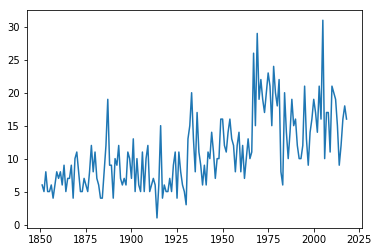

In [84]:
Years = [int(i)for i in Years]
CountPerYear = [int(i)for i in CountPerYear]
plt.plot(Years,CountPerYear)
plt.show()

In [85]:
fig = px.line(x = Years, y =CountPerYear)
fig.update_layout(
    xaxis = dict(
        dtick = 25
    )
)
fig.show()
#This is the same plot as above, except it is interactive

From Wiki: The 1969 Atlantic hurricane season was the most active Atlantic hurricane season since 1933 and is tied with 2019 as the fourth most active Atlantic hurricane season on record, and was also the final year of the most recent positive Atlantic multidecadal oscillation (AMO) era. The hurricane season officially began on June 1, and lasted until November 30. The season had the highest number of systems reach hurricane status – twelve – in a single season, until that record was surpassed in 2005. 

From NOAA: The AMO cycle swings between extended periods, typically lasting 20-40 years, of warm and cool phases in North Atlantic Ocean temperatures. The atmospheric conditions that make way for the AMO warm phase can create the perfect storm and heighten Atlantic hurricane activity and storm strength.


Hurricane Strength:

1. 74-95mph, or 64-82kt
2. 96-110mph, or 83-95kt
3. (major) 111-129mph , or 96-112kt
4. (major) 130-156mph, or 113-136kt
5. (major) 157mph+, or 137kt


In [88]:
#making a dataframe for Prophet
subdf = pd.DataFrame()
subdf['y'] = stormTracker
subdf['ds'] = Date
subdf.head(20)

,y,ds
0,1,1851-06-25
1,2,1851-07-05
2,3,1851-07-10
3,4,1851-08-16
4,5,1851-09-13
5,6,1851-10-16
6,7,1852-08-19
7,8,1852-09-05
8,9,1852-09-09
9,10,1852-09-22


In [89]:
m = Prophet()
m.fit(subdf)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
future = m.make_future_dataframe(periods = 100)

In [91]:
future.tail()

,ds
1968,2019-01-30
1969,2019-01-31
1970,2019-02-01
1971,2019-02-02
1972,2019-02-03


In [92]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1968,2019-01-30,1881.372492,1876.490131,1885.958010
1969,2019-01-31,1881.684517,1876.900164,1886.618257
1970,2019-02-01,1882.190224,1877.362078,1886.747666
1971,2019-02-02,1882.871601,1878.486048,1887.798019
1972,2019-02-03,1883.363116,1878.846686,1887.763560


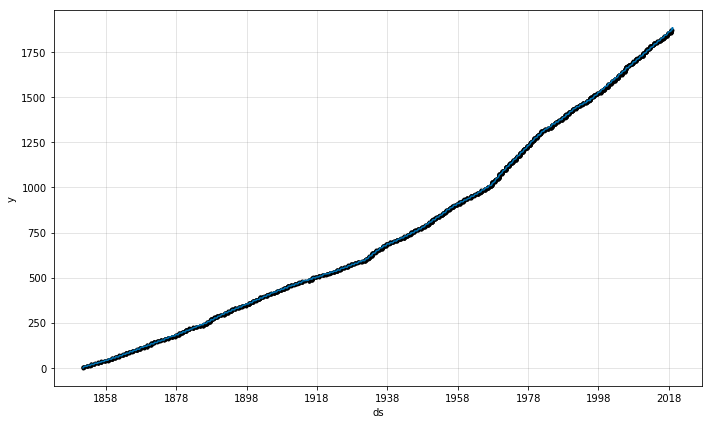

In [93]:
fig1 = m.plot(forecast)
#This is NOT correct yet - it does plot correct historical data with the blue line being prediction and the black the actual
#data, but I need to work on my arguments in the last several boxes to get it predicting future trends

In [ ]:
#Next I want to look at total MAJOR hurricanes, rather than just total per year